# Numpy 

Fundamental building block of scientific Python.
* Main attraction: Powerful and highly flexible array object; your new ubiquitous working unit.
* Set of most common mathematical utilities (constants, random numbers, linear algebra functions).

Navigation:
* [Basic array Parameters](http://lux20:8888/notebooks/NumPy%20Introduction-Solution.ipynb#Numpy-array-basics)
* [Creating arrays](http://lux20:8888/notebooks/NumPy%20Introduction-Solution.ipynb#Array-creation)
* [Slicing](http://lux20:8888/notebooks/NumPy%20Introduction-Solution.ipynb#Array-slicing)
* [Broadcasting](http://lux20:8888/notebooks/NumPy%20Introduction-Solution.ipynb#Broadcasting)
* [Exercises](http://lux20:8888/notebooks/NumPy%20Introduction-Solution.ipynb#Exercises)
* [Links](http://lux20:8888/notebooks/NumPy%20Introduction-Solution.ipynb#Links)

## Import

In [5]:
# imports
import numpy as np                 # It will be used a lot, so the shorthand is helpful.
import matplotlib.pyplot as plt    # Same here.
%matplotlib inline

# these can be useful if you plan on using the respective functions a lot:
np.random.seed(42)                 # Seeding is important to replicate results when using random numbers.
rnd = np.random.random

sin = np.sin                       # Be careful to no write "sin = np.sin()"! Why?
cos = np.cos

RAD2DEG = 180.0/np.pi              # Constants for quick conversion between radians (used by sin/cos) and degree
DEG2RAD = np.pi/180.0

## Numpy array basics
Every numpy array has some basic values that denote its format. Note that numpy array **cannot** change their size once they are created, but they **can** change their shape, i.e., an array will always hold the same number of elements, but their organization into rows and columns may change as desired.
* **ndarray.ndim:** The number of axes/dimensions of an array. The default matrix used for math problems is of dimensionality 2.
* **ndarray.shape:** A tuple of integers indicating the size of an array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim. 
* **ndarray.size:** The total number of elements of the array. This is equal to the product of the elements of shape. 
* **ndarray.dtype:** The data type of the array elements. Defaults to 64 bit floating point values and can be set when the array is created.

(*see:* [Numpy basics](http://wiki.scipy.org/Tentative_NumPy_Tutorial#head-6a1bc005bd80e1b19f812e1e64e0d25d50f99fe2))

In [6]:
m = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]], dtype=np.int32) # np.float32, np.float64, np.complex64, np.complex128
print m
print 'ndim: ', m.ndim, '\nshape:', m.shape, '\nsize: ', m.size, '\ndtype:', m.dtype

[[1 2 3]
 [4 5 6]
 [7 8 9]]
ndim:  2 
shape: (3L, 3L) 
size:  9 
dtype: int32


### Under the hood
* Numpy arrays believe in sharing is caring and will share their data with other arrays. Slicing does NOT return a new array, but instead a *view* on the data of another array:

In [7]:
s = m[1]
print 'BEFORE'
print s, 'slice', '\n'
print m, '\n'
s[0] = 0
print 'AFTER'
print s, 'slice' '\n'
print m, '\n'

BEFORE
[4 5 6] slice 

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

AFTER
[0 5 6] slice

[[1 2 3]
 [0 5 6]
 [7 8 9]] 



* You can check whether an array actually owns its data by looking at its flags (you should understand *both* differences in the two flag settings):

In [8]:
print m.flags, '\n'
print s.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False 

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


## Array creation

In [17]:
# helper function for examples below; plots the graphical depiction of a given numpy array
def showMatrix(X):
    Y = np.array(np.array(X, ndmin=2))  # 1D -> 2D
    vmin = min(np.min(Y), 0)
    vmax = max(np.max(Y), 1)
    plt.imshow(Y, interpolation='none', vmin=vmin, vmax=vmax, cmap=plt.cm.get_cmap('Blues'))

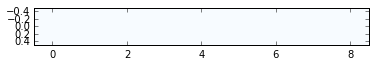

In [18]:
Z = np.zeros(9)
showMatrix(Z)

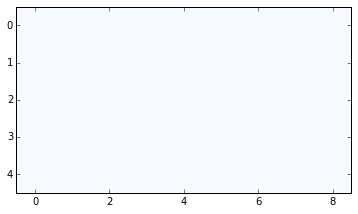

In [11]:
Z = np.zeros((5,9))
showMatrix(Z)

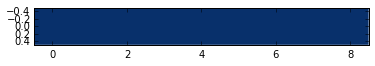

In [12]:
Z = np.ones(9)
showMatrix(Z)

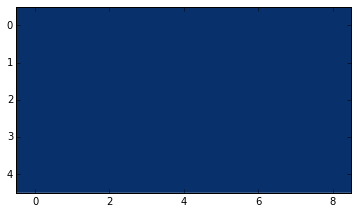

In [13]:
Z = np.ones((5,9))
showMatrix(Z)

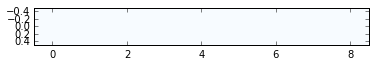

In [14]:
Z = np.array( [0,0,0,0,0,0,0,0,0] )
showMatrix(Z)

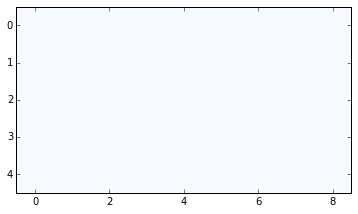

In [15]:
Z = np.array( [[0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0]] )
showMatrix(Z)

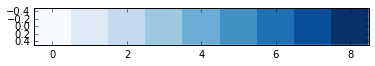

In [16]:
Z = np.arange(9)    # the numpy arange function also allows floating point arguments
showMatrix(Z)

(*see also:* [linspace](http://wiki.scipy.org/Numpy_Example_List#linspace))

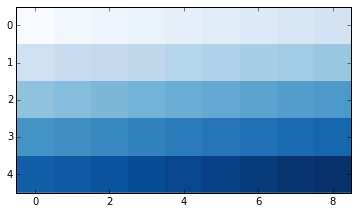

In [21]:
Z = np.arange(5*9).reshape(5,9)
showMatrix(Z)

- Reshape must not change the number of elements within the array.
- A vector of length ***n*** and a matrix of dimensions (1,***n***) ARE NOT THE SAME THING!

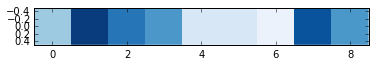

In [22]:
Z = np.random.uniform(0,1,9)  # args: min, max, no. of elements
showMatrix(Z)

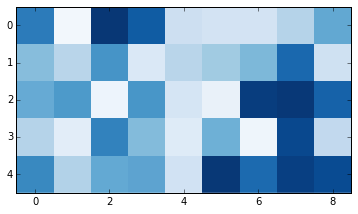

In [23]:
Z = np.random.uniform(0, 1, (5, 9))
showMatrix(Z)

(*see:* [Numpy array creation](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#creation) & [Numpy array reshaping](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#reshaping))

## Array slicing

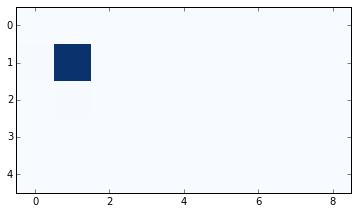

In [24]:
# single element
Z = np.zeros((5, 9))
Z[1,1] = 1
showMatrix(Z)

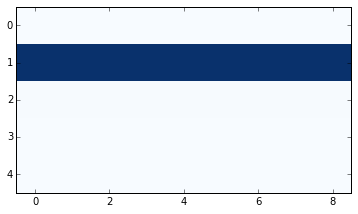

In [25]:
# single row
Z = np.zeros((5, 9))
Z[1,:] = 1
showMatrix(Z)

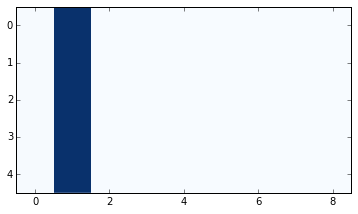

In [26]:
# single column
Z = np.zeros((5, 9))
Z[:,1] = 1
showMatrix(Z)

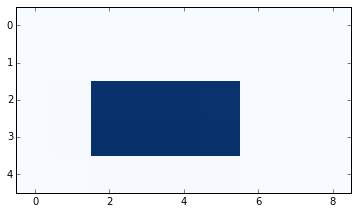

In [27]:
# specific area
Z = np.zeros((5, 9))
Z[2:4,2:6] = 1            # for each dimension format is always: <from:to:step> (with step being optional)
showMatrix(Z)

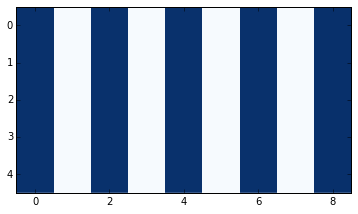

In [28]:
# every second column
Z = np.zeros((5, 9))
Z[:,::2] = 1              # for each dimension format is always: <from:to:step> (with step being optional)
showMatrix(Z)

In [29]:
# indices can be negative
Z = np.arange(10)
print ">>> Z[-1]:  ", Z[-1]       # start indexing at the back
print ">>> Z[3:-3]:", Z[3:-3]     # slice of array center
print ">>> Z[::-1]:", Z[::-1]     # quickly reverse an array

>>> Z[-1]:   9
>>> Z[3:-3]: [3 4 5 6]
>>> Z[::-1]: [9 8 7 6 5 4 3 2 1 0]


(*see:* [Numpy array slicing](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#slicing))

## Broadcasting

Arithmetic operations applied to two Numpy arrays of different dimensions leads to 'broadcasting', i.e., filling up the missing values to allow the operation if possible. This includes:
* Adding/subtracting/etc. a single value to a matrix.
* Adding/subtracting/etc. a column/row vector to a matrix.
* Adding/subtracting/etc. a column and a row vector.

**NOTE:** Multiplying with \* WILL ALSO BE APPLIED elementwise! Use **[np.dot()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)** for actual matrix multiplication!

**FUN FACT:** Truth value checks will also applied elementwise.

(*see:* [Numpy broadcasting](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#broadcasting))

## Exercises
1. Select a tile-pattern subset of a 5x9 matrix like this:
![Tile pattern](http://i.imgur.com/Cs7N10t.png)
2. ..and like this:
![Tile pattern](http://i.imgur.com/BnGdHle.png)
3. ..and also like this:
![Tile pattern](http://i.imgur.com/i3Lw1Zb.png)
4. Adapt the code for No.3 so that it works with arrays of arbitrary dimensions.
5. Write the code that perfoms the operation depicted below ([source](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#broadcasting)). Parameterize your code and use the above utility function to plot the final matrix in dimensions 8x2 and 256x64.
![Broadcast op](http://i.imgur.com/M3kL9we.png)
6. Write a function that subtracts the mean from a given matrix (arbitrary dimensions).
7. Write a function that gradually weighs the rows of a given matrix from top to bottom (arbitrary dimensions).
8. Write one line that checks whether there are any values smaller than 0 within a given array.
9. Create a two dimensional array containing the values 0..9.
    1. Reverse the order of the rows of the matrix using a single slice.
    2. Reverse the order of the columns of the matrix using a single slice.
    3. Reverse the order of both the rows and the columns of the matrix using a single slice.
10. Check the [documentation](http://docs.scipy.org/doc/): What is the difference between **np.max()** and **np.nanmax()**?
    1. Think of two cases where it would be important to use one over the other!
    2. Explain how you can find both functions using only the numpy documentation itself.

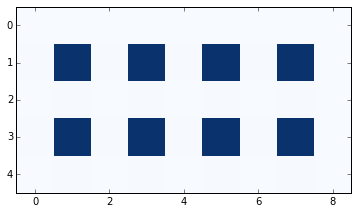

In [46]:
#-#-# EXC_NUMPY: YOUR CODE HERE #-#-#
Z = np.zeros((5, 9))
Z[1::2,1::2] = 1
showMatrix(Z)

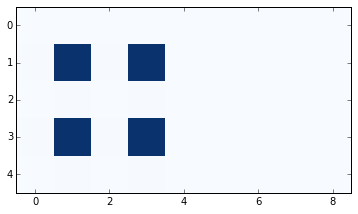

In [35]:
Z = np.zeros((5, 9))
Z[1::2,1:4:2] = 1
showMatrix(Z)

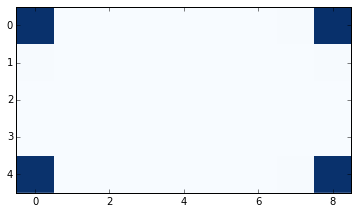

In [37]:
Z = np.zeros((5, 9))
Z[::Z.shape[0]-1,::Z.shape[1]-1] = 1
showMatrix(Z)

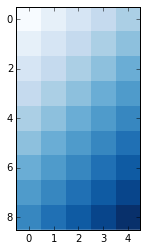

In [44]:
Z1 = np.arange(9).reshape((9,1))
Z2 = np.arange(5).reshape((1,5))
Z = Z1+Z2
showMatrix(Z)

In [49]:
def make_mean_free(X):
    X -= np.mean(X)

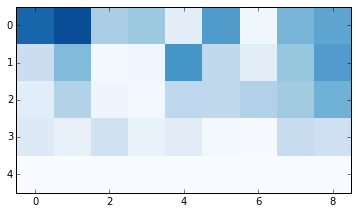

In [61]:
def gradual_weighting(X):
    weights = np.linspace(1, 0, X.shape[0]).reshape( (-1, 1) )
    X *= weights

Z = np.random.uniform(0, 1, (5, 9))
gradual_weighting(Z)
showMatrix(Z)

In [110]:
np.random.seed()
Z = np.random.normal(3,2,6)
(Z < 0).any()

[ 3.07411596  1.62778989  5.71077433  1.82567383 -0.72803201  3.50502973]


True

In [127]:
Z = np.arange(10).reshape((2,5))
print( Z )
print( Z[::-1] )
print( Z[...,::-1])
print( Z[::-1,::-1] )

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[5 6 7 8 9]
 [0 1 2 3 4]]
[[4 3 2 1 0]
 [9 8 7 6 5]]
[[9 8 7 6 5]
 [4 3 2 1 0]]
9


### Task 10
nanmax ignores nans in the array. It is suitable if nan values are expected, for instance when evaluating a fuction that might tend to -infinity at the borders.

## Links
* [Quick reference (types, array handling)](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#quick-references)
* [Tentative numpy tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)